## Remove unused columns, rows with missing info, etc.

In [1]:
import sys

sys.path.append("../scripts")

import pandas as pd
from matplotlib import pyplot as plt

from load import load_config, merge_metadata
from plot_utils import plot_unique_value_hist
from preprocess import drop_na_feature_rows

#### Read and merge metadata

In [2]:
metadata_configs = load_config("../configs/metadata_dino")
metadata_configs.keys()

dict_keys(['well', 'profile', 'plate', 'platemap', 'cell_count', 'orf'])

In [3]:
ann_df = merge_metadata(metadata_configs)
ann_df

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,emb_0370,emb_0371,emb_0372,emb_0374,emb_0376,emb_0377,emb_0378,emb_0379,emb_0380,emb_0381
0,JCP2022_900002,ccsbBroad304_00001,ORF008415.1_TRC304.1,pLX_304,NM_001160173.3,NAT1,9,9606,N-acetyltransferase 1,100.0,...,0.359052,0.584827,0.053143,0.169417,0.698390,0.314690,-0.793094,0.069260,-0.693395,-0.433077
1,JCP2022_900011,ccsbBroad304_00013,ORF009063.1_TRC304.1,pLX_304,NM_001612.6,ACRV1,56,9606,acrosomal vesicle protein 1,100.0,...,0.251987,0.747549,0.885155,0.175276,1.076188,0.307907,0.241402,0.487109,0.230589,-0.867933
2,JCP2022_900033,ccsbBroad304_00037,ORF015627.1_TRC304.1,pLX_304,NM_001136.5,AGER,177,9606,advanced glycosylation end-product specific re...,100.0,...,-0.407058,-0.637847,-0.022547,1.279020,-0.965272,-1.325133,0.748548,0.080144,0.768118,-0.609445
3,JCP2022_900063,ccsbBroad304_00069,ORF005433.1_TRC304.1,pLX_304,NM_001153.5,ANXA4,307,9606,annexin A4,100.0,...,-0.386609,-0.176452,-0.010553,0.452436,-0.042854,0.809550,1.286868,0.409611,1.279622,0.008222
4,JCP2022_900084,ccsbBroad304_00091,ORF014376.1_TRC304.1,pLX_304,NM_001651.4,AQP5,362,9606,aquaporin 5,100.0,...,0.031903,0.782813,-0.701367,-3.051859,-0.312850,1.606997,-0.729577,-1.823662,1.355541,0.184576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79086,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,1.194178,0.872460,-1.670895,0.062252,-0.490462,-0.851062,1.062477,-0.008900,1.049159,-0.147353
79087,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,0.454933,-0.073673,0.022906,0.967972,0.156685,0.116559,0.299043,0.336091,-0.721333,-0.399992
79088,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-1.337919,-0.389856,0.966840,1.383614,-0.805346,0.714060,-0.311349,0.435823,-0.443019,-0.630327
79089,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-0.236578,0.033715,-0.352201,0.338147,-1.502951,-0.489689,-0.826536,-0.631804,-1.271874,-0.397533


In [4]:
# print only the columns of ann_df starting with "Metadata_"

ann_df.loc[:, ann_df.columns.str.startswith("Metadata_")]

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,Metadata_Insert_Length,Metadata_pert_type,Metadata_Source,Metadata_Plate,Metadata_Well,Metadata_plate_map_name,Metadata_Batch,Metadata_PlateType
0,JCP2022_900002,ccsbBroad304_00001,ORF008415.1_TRC304.1,pLX_304,NM_001160173.3,NAT1,9,9606,N-acetyltransferase 1,100.0,870.0,trt,source_4,BR00125170,E18,OAB09.10.11.12.A,2021_06_21_Batch7,ORF
1,JCP2022_900011,ccsbBroad304_00013,ORF009063.1_TRC304.1,pLX_304,NM_001612.6,ACRV1,56,9606,acrosomal vesicle protein 1,100.0,795.0,trt,source_4,BR00125170,B09,OAB09.10.11.12.A,2021_06_21_Batch7,ORF
2,JCP2022_900033,ccsbBroad304_00037,ORF015627.1_TRC304.1,pLX_304,NM_001136.5,AGER,177,9606,advanced glycosylation end-product specific re...,100.0,1212.0,trt,source_4,BR00125170,K03,OAB09.10.11.12.A,2021_06_21_Batch7,ORF
3,JCP2022_900063,ccsbBroad304_00069,ORF005433.1_TRC304.1,pLX_304,NM_001153.5,ANXA4,307,9606,annexin A4,100.0,963.0,trt,source_4,BR00125170,H11,OAB09.10.11.12.A,2021_06_21_Batch7,ORF
4,JCP2022_900084,ccsbBroad304_00091,ORF014376.1_TRC304.1,pLX_304,NM_001651.4,AQP5,362,9606,aquaporin 5,100.0,795.0,trt,source_4,BR00125170,B17,OAB09.10.11.12.A,2021_06_21_Batch7,ORF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79086,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00126543,D16,OKA01.02.03.04.A,2021_08_30_Batch13,ORF
79087,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00126543,F19,OKA01.02.03.04.A,2021_08_30_Batch13,ORF
79088,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00126543,I11,OKA01.02.03.04.A,2021_08_30_Batch13,ORF
79089,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,3204.0,negcon,source_4,BR00126543,M24,OKA01.02.03.04.A,2021_08_30_Batch13,ORF


#### Visualize ratio of num unique values to data size

Experiments showed that even after adding cell pcounts as a feature, it typically is filtered out later by pycytominer's `feature_select`.

The reason for that is relatively low number of unique values.

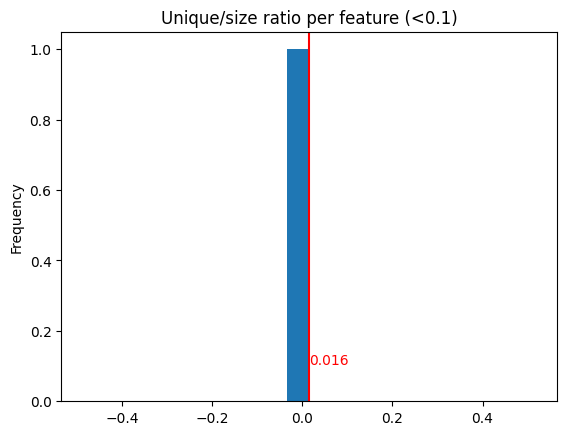

In [5]:
plot_unique_value_hist(ann_df, unique_ratio_cutoff=0.1, features="Cells_Count")

#### List metadata stats

In [6]:
ann_df.filter(regex="^Metadata_").nunique()

Metadata_JCP2022             15095
Metadata_broad_sample        15095
Metadata_Name                15095
Metadata_Vector                  1
Metadata_Transcript          13551
Metadata_Symbol              12600
Metadata_NCBI_Gene_ID        12600
Metadata_Taxon_ID                2
Metadata_Gene_Description    12450
Metadata_Prot_Match            904
Metadata_Insert_Length        1667
Metadata_pert_type               2
Metadata_Source                  1
Metadata_Plate                 225
Metadata_Well                  368
Metadata_plate_map_name         45
Metadata_Batch                  12
Metadata_PlateType               1
dtype: int64

#### Remove rows with NaNs in features

In [7]:
ann_df[ann_df.filter(regex="^(?!Metadata_)").isnull().T.any()]

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,emb_0370,emb_0371,emb_0372,emb_0374,emb_0376,emb_0377,emb_0378,emb_0379,emb_0380,emb_0381


In [8]:
ann_df = drop_na_feature_rows(ann_df)
ann_df

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,emb_0370,emb_0371,emb_0372,emb_0374,emb_0376,emb_0377,emb_0378,emb_0379,emb_0380,emb_0381
0,JCP2022_900002,ccsbBroad304_00001,ORF008415.1_TRC304.1,pLX_304,NM_001160173.3,NAT1,9,9606,N-acetyltransferase 1,100.0,...,0.359052,0.584827,0.053143,0.169417,0.698390,0.314690,-0.793094,0.069260,-0.693395,-0.433077
1,JCP2022_900011,ccsbBroad304_00013,ORF009063.1_TRC304.1,pLX_304,NM_001612.6,ACRV1,56,9606,acrosomal vesicle protein 1,100.0,...,0.251987,0.747549,0.885155,0.175276,1.076188,0.307907,0.241402,0.487109,0.230589,-0.867933
2,JCP2022_900033,ccsbBroad304_00037,ORF015627.1_TRC304.1,pLX_304,NM_001136.5,AGER,177,9606,advanced glycosylation end-product specific re...,100.0,...,-0.407058,-0.637847,-0.022547,1.279020,-0.965272,-1.325133,0.748548,0.080144,0.768118,-0.609445
3,JCP2022_900063,ccsbBroad304_00069,ORF005433.1_TRC304.1,pLX_304,NM_001153.5,ANXA4,307,9606,annexin A4,100.0,...,-0.386609,-0.176452,-0.010553,0.452436,-0.042854,0.809550,1.286868,0.409611,1.279622,0.008222
4,JCP2022_900084,ccsbBroad304_00091,ORF014376.1_TRC304.1,pLX_304,NM_001651.4,AQP5,362,9606,aquaporin 5,100.0,...,0.031903,0.782813,-0.701367,-3.051859,-0.312850,1.606997,-0.729577,-1.823662,1.355541,0.184576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79086,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,1.194178,0.872460,-1.670895,0.062252,-0.490462,-0.851062,1.062477,-0.008900,1.049159,-0.147353
79087,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,0.454933,-0.073673,0.022906,0.967972,0.156685,0.116559,0.299043,0.336091,-0.721333,-0.399992
79088,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-1.337919,-0.389856,0.966840,1.383614,-0.805346,0.714060,-0.311349,0.435823,-0.443019,-0.630327
79089,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-0.236578,0.033715,-0.352201,0.338147,-1.502951,-0.489689,-0.826536,-0.631804,-1.271874,-0.397533


#### Save filtered profiles with metadata

In [9]:
ann_df.to_parquet(
    "output/sphering_mad_robustize_filtered_profiles.parquet", index=False
)

#### Make sure no metadata columns weren't matched when merging

In [10]:
# list features ending with either "_x" or "_y", case insensitive
ann_df.columns[ann_df.columns.str.contains("(_x|_y)$", case=False)]

/var/folders/24/rq9nr3254ks1cny3_83r43bc0000gp/T/ipykernel_94225/3356552406.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ann_df.columns[ann_df.columns.str.contains("(_x|_y)$", case=False)]


Index([], dtype='object')